### 1. Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Apps_data+(1).csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.shape

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [8]:
df.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [9]:
df.duplicated().sum()

483

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
df.duplicated().sum()

0

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [13]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
dum = df['Category'] == '1.9'
df[dum]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
df.drop(10472, inplace = True)

In [16]:
df.shape

(10357, 13)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [17]:
df['Rating'].isnull().sum()

1465

In [18]:
lst1=list(df[df["Rating"].isnull()].index)

In [19]:
df.drop(lst1, inplace = True)

In [20]:
df.shape

(8892, 13)

In [21]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [22]:
df['Rating_category'] = df['Rating'].apply(lambda x : 'High'if x > 3.5 else 'Low')

In [23]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

Text(0.5, 0, 'Rating_category')

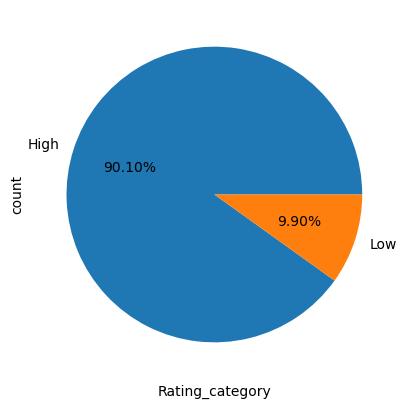

In [24]:
df['Rating_category'].value_counts().plot(kind = 'pie', autopct = '%.2f%%');
plt.xlabel('Rating_category')

90.10% of Apps are having high rating and only 9.90% of Apps having low rating

Text(0.5, 1.0, 'Distribution of Rating_category')

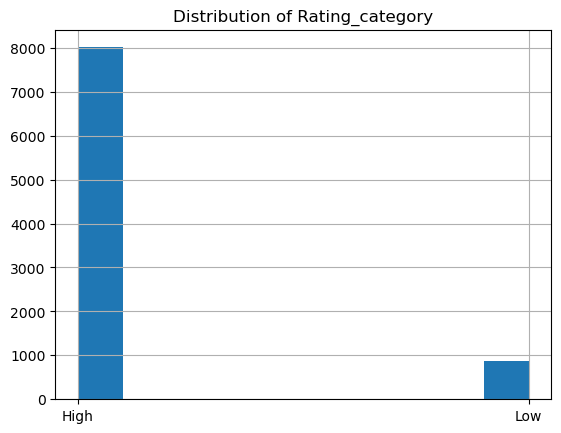

In [25]:
(df['Rating_category']).hist()
plt.title('Distribution of Rating_category')

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [26]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: object

In [27]:
df['Reviews'] = pd.to_numeric(df.Reviews)

In [28]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int64

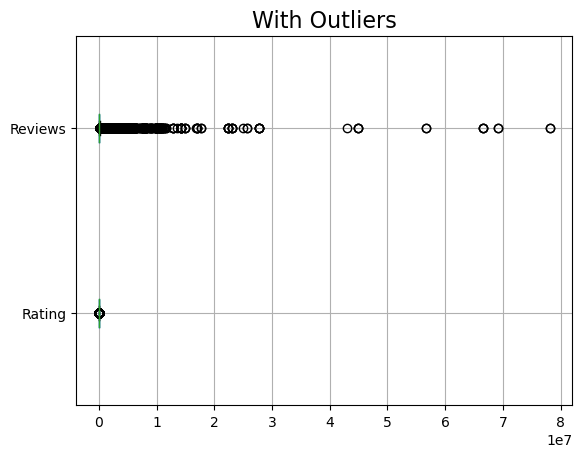

In [29]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [30]:
df['Reviews'].skew()

16.207669086966867

<Axes: xlabel='Reviews', ylabel='Density'>

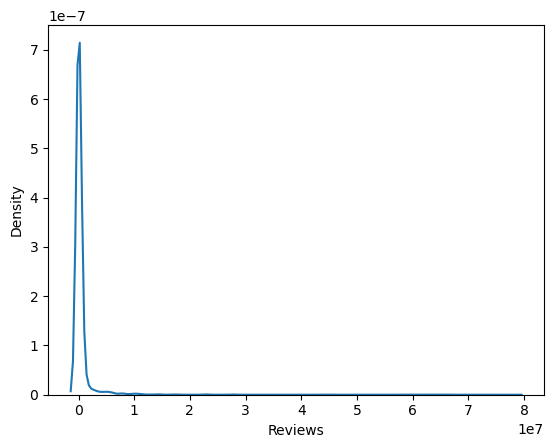

In [31]:
sns.kdeplot(df['Reviews'])

In [32]:
df['Reviews']=np.log(df['Reviews'])

In [33]:
df['Reviews']

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10834     1.945910
10836     3.637586
10837     1.386294
10839     4.736198
10840    12.894978
Name: Reviews, Length: 8892, dtype: float64

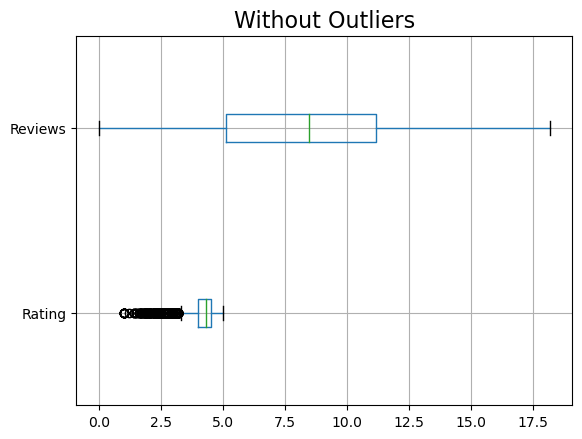

In [34]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
df[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

<Axes: xlabel='Reviews', ylabel='Density'>

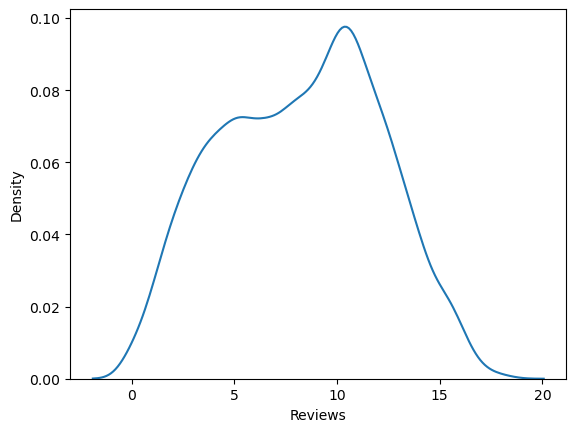

In [35]:
sns.kdeplot((df['Reviews']))

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [36]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [37]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [38]:
df['Size']=df['Size'].str.replace('M','e6')
df['Size']=df['Size'].str.replace('K','e3')
df['Size']=pd.to_numeric(df['Size'],errors="coerce")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [39]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size               1725
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           4
Android Ver           2
Rating_category       0
dtype: int64

In [40]:
df = df[df['Size'].notnull()]
df.shape

(7167, 14)

In [41]:
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        3
Android Ver        2
Rating_category    0
dtype: int64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [42]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10830       100,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7167, dtype: object

In [43]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [44]:
df['Installs'] = df['Installs'].str.replace(',' , '').str.replace( '+' , '').astype('int') #, regex = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9300\4207183125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].str.replace(',' , '').str.replace( '+' , '').astype('int') #, regex = True)


In [45]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10830      100000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7167, dtype: int32

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7167 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7167 non-null   object 
 1   Category         7167 non-null   object 
 2   Rating           7167 non-null   float64
 3   Reviews          7167 non-null   float64
 4   Size             7167 non-null   float64
 5   Installs         7167 non-null   int32  
 6   Type             7167 non-null   object 
 7   Price            7167 non-null   object 
 8   Content Rating   7167 non-null   object 
 9   Genres           7167 non-null   object 
 10  Last Updated     7167 non-null   object 
 11  Current Ver      7164 non-null   object 
 12  Android Ver      7165 non-null   object 
 13  Rating_category  7167 non-null   object 
dtypes: float64(3), int32(1), object(10)
memory usage: 811.9+ KB


### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [47]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10830    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7167, dtype: object

In [48]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49', '$7.49',
       '$1.50', '$19.99', '$15.99', '$33.99', '$39.99', '$2.49', '$4.49',
       '$1.70', '$1.49', '$3.88', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$15.46', '$8.99', '$3.04', '$13.99',
       '$4.29', '$3.28', '$4.60', '$1.00', '$10.99', '$2.90', '$1.97',
       '$2.56', '$1.20'], dtype=object)

In [49]:
df['Price'] = df['Price'].str.replace('$' , '')
df.describe()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9300\2512634992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('$' , '')


,Rating,Reviews,Size,Installs
count,7167.000000,7167.000000,7.167000e+03,7.167000e+03
mean,4.177410,7.685271,2.354796e+07,8.086405e+06
std,0.549583,3.746643,2.346010e+07,4.710472e+07
min,1.000000,0.000000,1.000000e+06,1.000000e+00
25%,4.000000,4.677480,5.700000e+06,1.000000e+04
50%,4.300000,7.765993,1.500000e+07,1.000000e+05
75%,4.500000,10.568736,3.400000e+07,1.000000e+06
max,5.000000,17.619812,1.000000e+08,1.000000e+09


In [50]:
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '7.49', '1.50',
       '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70', '1.49',
       '3.88', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '1.59', '299.99', '379.99', '37.99', '18.99',
       '389.99', '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40',
       '15.46', '8.99', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '10.99', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [51]:
df['Price'].sample()

5082    0
Name: Price, dtype: object

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [52]:
col=['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver']
df.drop(col,axis=1,inplace=True)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9300\2514769578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1,inplace=True)


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0,Everyone,High


### 13. Encode the categorical columns.

In [53]:
df.describe(include = 'object')

,Category,Type,Price,Content Rating,Rating_category
count,7167,7167,7167,7167,7167
unique,33,2,66,6,2
top,FAMILY,Free,0,Everyone,High
freq,1569,6670,6670,5709,6385


In [54]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [55]:
df=pd.get_dummies(df,columns=(["Category","Type","Content Rating"]),drop_first=True)

In [56]:
df["Rating_category"]=df["Rating_category"].apply(lambda x:1 if x=="high" else 0)

In [57]:
df

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000.0,10000,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,6.874198,14000000.0,500000,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,11.379508,8700000.0,5000000,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,12.281384,25000000.0,50000000,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6.874198,2800000.0,100000,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,6.781058,2300000.0,100000,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10834,1.945910,2600000.0,500,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10836,3.637586,53000000.0,5000,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10837,1.386294,3600000.0,100,0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [58]:
x = df.drop(['Rating_category'],axis = 1)
x

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000.0,10000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,6.874198,14000000.0,500000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,11.379508,8700000.0,5000000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,12.281384,25000000.0,50000000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,6.874198,2800000.0,100000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,6.781058,2300000.0,100000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10834,1.945910,2600000.0,500,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10836,3.637586,53000000.0,5000,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10837,1.386294,3600000.0,100,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [59]:
y = df['Rating_category']
y

0        0
1        0
2        0
3        0
4        0
        ..
10830    0
10834    0
10836    0
10837    0
10840    0
Name: Rating_category, Length: 7167, dtype: int64

### 15. Split the dataset into train and test.

In [60]:
# split x and y into training and testing set in 75:25 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 555)


In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5733, 42)
(1434, 42)
(5733,)
(1434,)


### 16. Standardize the data, so that the values are within a particular range.

In [62]:
# Min Max method of scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)
df2 = pd.DataFrame(mms.transform(df))
df2.columns = df.columns
df2

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.287682,0.181818,9.999000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.390140,0.131313,4.999990e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.645836,0.077778,4.999999e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.697021,0.242424,5.000000e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.390140,0.018182,9.999900e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,0.384854,0.013131,9.999900e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7163,0.110439,0.016162,4.990000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7164,0.206449,0.525253,4.999000e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7165,0.078678,0.026263,9.900000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
